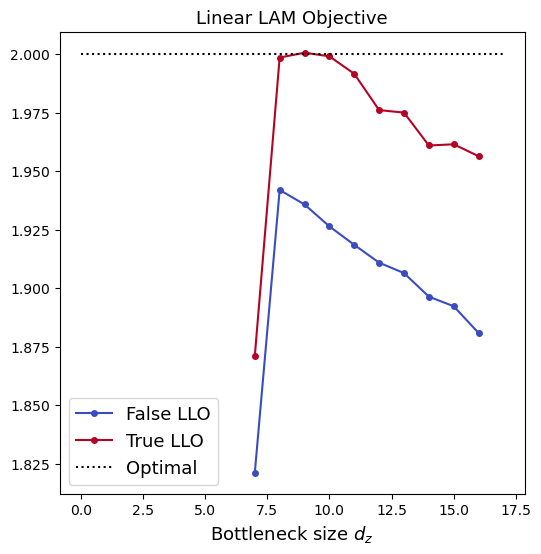

In [14]:
import matplotlib.pyplot as plt
import pandas as pd


record1 = pd.read_csv('scripts/6_use_kappa_True.csv', index_col=0)
record1['use_kappa'] = True
record2 = pd.read_csv('scripts/6_use_kappa_False.csv', index_col=0)
record2['use_kappa'] = False

total_record = pd.concat([record1, record2])
total_record = total_record.loc[total_record['iter'] == 40000]
total_record['LLO'] = - total_record['act_mse'] + total_record['obs_mse'] + total_record['noi_mse']
total_record = total_record.loc[total_record['dz'] >= 7]

plt.figure(figsize=(6, 6))

cmap = plt.get_cmap('coolwarm') 
norm = plt.Normalize(vmin=0, vmax=len(total_record.groupby('use_kappa')) - 1) 

counter = 0
for use_kappa, group in total_record.groupby('use_kappa'):
    sorted_group = group.sort_values('dz')
    plt.plot(sorted_group['dz'], sorted_group['LLO'], 
            label=f'{use_kappa} LLO', marker='o', markersize=4, color=cmap(norm(counter)))
    counter += 1

plt.plot([0, 17], [2, 2], 'k:', label='Optimal')

# plt.xlim([0.0, 1.0])
plt.title(r'Linear LAM Objective', fontsize=13)
plt.xlabel('Bottleneck size $d_z$', fontsize=13)
plt.legend(fontsize=13)

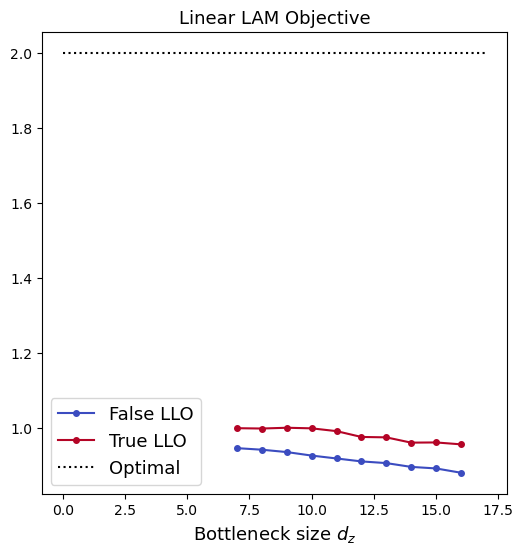

In [17]:
import matplotlib.pyplot as plt
import pandas as pd


record1 = pd.read_csv('scripts/6_use_kappa_True.csv', index_col=0)
record1['use_kappa'] = True
record2 = pd.read_csv('scripts/6_use_kappa_False.csv', index_col=0)
record2['use_kappa'] = False

total_record = pd.concat([record1, record2])
total_record = total_record.loc[total_record['iter'] == 40000]
total_record['LLO'] = - total_record['act_mse'] + total_record['obs_mse'] + total_record['noi_mse']
total_record = total_record.loc[total_record['dz'] >= 7]

plt.figure(figsize=(6, 6))

cmap = plt.get_cmap('coolwarm') 
norm = plt.Normalize(vmin=0, vmax=len(total_record.groupby('use_kappa')) - 1) 

counter = 0
for use_kappa, group in total_record.groupby('use_kappa'):
    sorted_group = group.sort_values('dz')
    plt.plot(sorted_group['dz'], sorted_group['obs_mse'], 
            label=f'{use_kappa} LLO', marker='o', markersize=4, color=cmap(norm(counter)))
    counter += 1

plt.plot([0, 17], [2, 2], 'k:', label='Optimal')

# plt.xlim([0.0, 1.0])
plt.title(r'Linear LAM Objective', fontsize=13)
plt.xlabel('Bottleneck size $d_z$', fontsize=13)
plt.legend(fontsize=13)